In [1]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('winequality-red.csv', sep=';')

# Display first few rows
df.head()

# Get summary information
df.info()

# Get descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


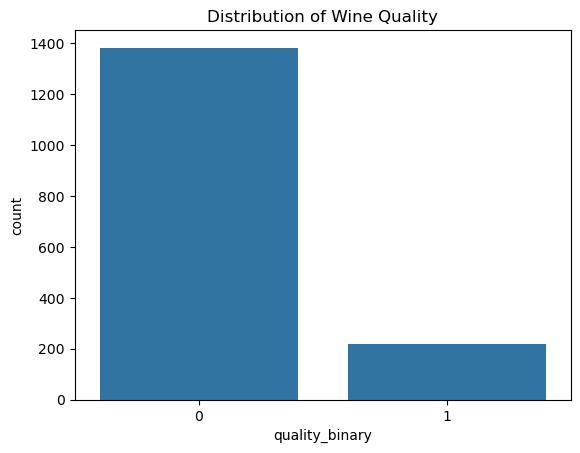

In [3]:
# Check for missing values
df.isnull().sum()

# Convert 'quality' into binary classes
df['quality_binary'] = np.where(df['quality'] >= 7, 1, 0)

# Plot distribution
sns.countplot(x='quality_binary', data=df)
plt.title('Distribution of Wine Quality')
plt.show()


In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [15]:
# Separate features and target
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

# Before scaling
X.describe()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# After scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Before Scaling:\n", X['pH'].head(7))
print("\nAfter Scaling:\n", X_scaled_df['pH'].head(7))

Before Scaling:
 0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
5    3.51
6    3.30
Name: pH, dtype: float64

After Scaling:
 0    1.288643
1   -0.719933
2   -0.331177
3   -0.979104
4    1.288643
5    1.288643
6   -0.072005
Name: pH, dtype: float64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [17]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the optimal K
param_grid = {'n_neighbors': np.arange(1, 31)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Optimal K
optimal_k = knn_cv.best_params_['n_neighbors']
print(f"Optimal number of neighbors: {optimal_k}")

# Train the model with optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Make predictions
y_pred = knn_optimal.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)


Optimal number of neighbors: 4
Accuracy: 0.88125
Confusion Matrix:
[[398  15]
 [ 42  25]]


Task 4

In [18]:
# Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("SVM with Linear Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))

# RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the models
accuracy_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

print(f"Linear Kernel - Accuracy: {accuracy_linear}")
print("Linear Kernel - Confusion Matrix:")
print(cm_linear)

print(f"RBF Kernel - Accuracy: {accuracy_rbf}")
print("RBF Kernel - Confusion Matrix:")
print(cm_rbf)


SVM with Linear Kernel:
Accuracy: 0.8604
Confusion Matrix:
[[413   0]
 [ 67   0]]
Linear Kernel - Accuracy: 0.8604166666666667
Linear Kernel - Confusion Matrix:
[[413   0]
 [ 67   0]]
RBF Kernel - Accuracy: 0.8833333333333333
RBF Kernel - Confusion Matrix:
[[403  10]
 [ 46  21]]


In [19]:
# Summary table of accuracy scores
summary = {
  'Classifier': ['KNN', 'SVM (Linear Kernel)', 'SVM (RBF Kernel)'],
  'Accuracy': [accuracy, accuracy_linear, accuracy_rbf]
}
summary_df = pd.DataFrame(summary)
print(summary_df)

            Classifier  Accuracy
0                  KNN  0.881250
1  SVM (Linear Kernel)  0.860417
2     SVM (RBF Kernel)  0.883333


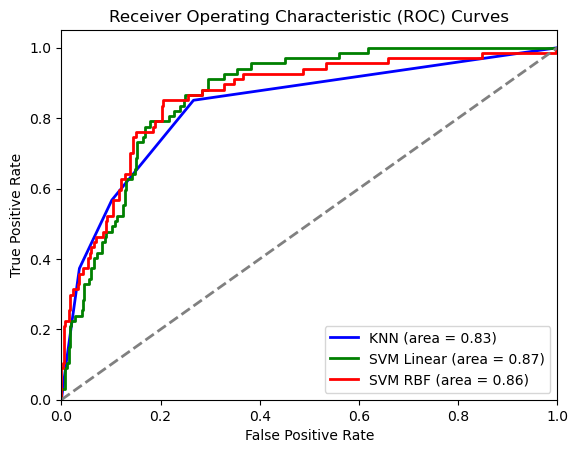

In [20]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each classifier
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_optimal.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, svm_linear.decision_function(X_test))
roc_auc_svm_linear = auc(fpr_svm_linear, tpr_svm_linear)

fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, svm_rbf.decision_function(X_test))
roc_auc_svm_rbf = auc(fpr_svm_rbf, tpr_svm_rbf)

# Plot ROC curves
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm_linear, tpr_svm_linear, color='green', lw=2, label='SVM Linear (area = %0.2f)' % roc_auc_svm_linear)
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='red', lw=2, label='SVM RBF (area = %0.2f)' % roc_auc_svm_rbf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()